In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import math
import statsmodels.api as sm
from tabulate import tabulate

In [2]:
df = pd.read_csv('salary.csv')
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [4]:
df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [5]:
df.dtypes

salary         float64
exprior          int64
yearsworked      int64
yearsrank        int64
market         float64
degree           int64
otherqual        int64
position         int64
male             int64
Field            int64
yearsabs         int64
dtype: object

In [6]:
max_min = df.describe().loc[['min','max']]
max_min

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
min,29000.0,0.0,0.0,0.0,0.71,0.0,0.0,1.0,0.0,1.0,0.0
max,96156.0,25.0,41.0,28.0,1.33,1.0,1.0,3.0,1.0,4.0,118.0


In [7]:
salary_mean = np.mean(df['salary'])
salary_mean

50863.22009783626

In [8]:
df['salary'].sem()

560.0622753925232

In [9]:
np.std(df['yearsworked'])

9.435503224576884

In [10]:
q2 = df['salary'].median()
q2

50096.0

In [11]:
q1 = df["salary"].quantile(0.25)
q3 = df["salary"].quantile(0.75)
iqr = q3 - q1
iqr

20345.0

In [12]:
new_name = {'male': {0:'Women', 1:'Men'} }
df.replace(new_name, inplace=True)


In [13]:
df.tail()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
509,45906.0,6,17,11,0.92,1,0,2,Women,2,70
510,60402.0,6,19,7,0.86,1,0,3,Women,1,72
511,53187.0,19,7,6,0.78,1,0,3,Women,4,76
512,56542.0,8,20,10,0.78,1,0,3,Women,2,78
513,52662.0,13,25,11,0.78,1,0,3,Women,1,112


In [14]:
total_gender = df['male'].value_counts()
total_gender

Men      386
Women    128
Name: male, dtype: int64

In [15]:
executive = df[df['position'] == 3]
e = executive['male'].value_counts()
comparison = e.iloc[0] - e.iloc[1]
print(f'There are {e.iloc[0]} male executives')
print(f'There are {e.iloc[1]} female executives')
print(f'There are {comparison} more male executives compared to women')

There are 192 male executives
There are 19 female executives
There are 173 more male executives compared to women


In [22]:
df0 = df[(df['position']==3) & (df['male']=='Women')]
df0.male.value_counts()

Women    19
Name: male, dtype: int64

In [23]:
df1 = df[(df['position']==3) & (df['male']=='Men')]
df1.male.value_counts()

Men    192
Name: male, dtype: int64

In [25]:
df2 = len(df1) - len(df0)
df2

173

AttributeError: 'AxesSubplot' object has no attribute 'mean'

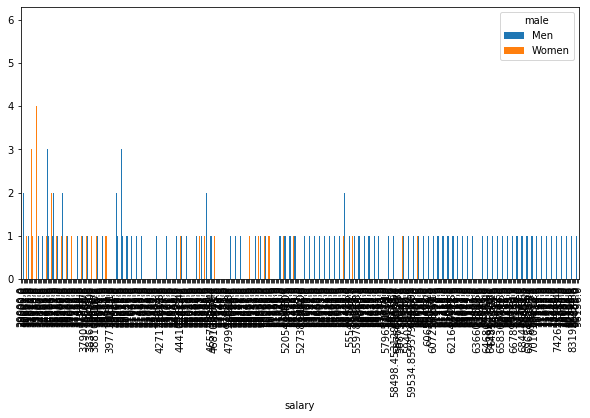

In [43]:
list = ['salary']
for i in list:
    df.groupby([i, "male"]).size().unstack().plot(kind='bar', stacked=False, figsize=(10,5))
    plt.title('{} vs male'.format(i))
    plt.show()

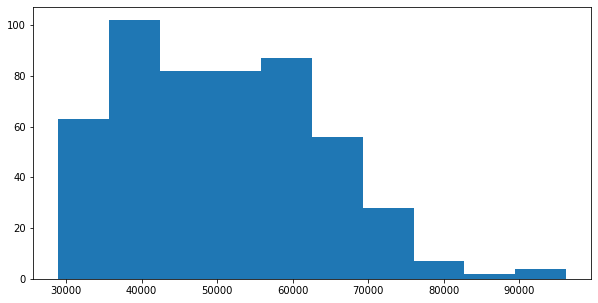

In [38]:
plt.figure(figsize=(10,5))
plt.hist(df['salary'])
plt.show()